In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [2]:
import cv2
import os
import numpy as np
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.utils import shuffle
from sklearn.metrics import f1_score

In [38]:
# the below code loads the dataset from the google drive into the arrays X and y and returns the same
def load_dataset(directory):
    X = []
    y = []
    for filename in os.listdir(directory):
        if filename.endswith('.pgm'):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (19, 19)) # all images have been scaled to 19x19 size
            X.append(img)
            if 'face' in filename:
                y.append(1)
            else:
                y.append(0)
    X = np.array(X)
    y = np.array(y)
    return X, y

In [4]:
X_train, y_train = load_dataset('gdrive/MyDrive/dataset/train/train')
X_train, y_train = shuffle(X_train, y_train, random_state=42) # shuffling the training dataset

X_test, y_test = load_dataset('gdrive/MyDrive/dataset/test/test')
X_test, y_test = shuffle(X_test, y_test, random_state=42)     # shufflingn the test dataset

In [5]:
# checking if the datset has been imported properly
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6977, 19, 19)
(6977,)
(24018, 19, 19)
(24018,)


In [6]:
# building a sequential CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(19,19,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
model.summary() # the summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 17, 17, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 64)                3

In [8]:
model.fit(X_train, y_train, epochs=10, batch_size=16) # training the model

Epoch 1/10
437/437 [==============================] - 6s 10ms/step - loss: 0.3160 - accuracy: 0.9295
Epoch 2/10
437/437 [==============================] - 5s 10ms/step - loss: 0.0633 - accuracy: 0.9795
Epoch 3/10
437/437 [==============================] - 5s 12ms/step - loss: 0.0358 - accuracy: 0.9887
Epoch 4/10
437/437 [==============================] - 4s 9ms/step - loss: 0.0628 - accuracy: 0.9818
Epoch 5/10
437/437 [==============================] - 4s 9ms/step - loss: 0.0272 - accuracy: 0.9911
Epoch 6/10
437/437 [==============================] - 8s 18ms/step - loss: 0.0257 - accuracy: 0.9920
Epoch 7/10
437/437 [==============================] - 7s 16ms/step - loss: 0.0188 - accuracy: 0.9940
Epoch 8/10
437/437 [==============================] - 7s 15ms/step - loss: 0.0299 - accuracy: 0.9928
Epoch 9/10
437/437 [==============================] - 4s 10ms/step - loss: 0.0132 - accuracy: 0.9954
Epoch 10/10
437/437 [==============================] - 4s 9ms/step - loss: 0.0115 - accuracy:

In [9]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_test, y_test)

# Print the accuracy
print('Accuracy:', accuracy)

751/751 [==============================] - 5s 6ms/step - loss: 0.1277 - accuracy: 0.9800
Accuracy: 0.980014979839325


In [ ]:
# Thus we see above that we get an accuray of 98 % on the test dataset

In [10]:
model.save('gdrive/MyDrive/dataset/new.h5') # Saving the model for using it anytime in future

In [11]:
# this function returns the predictions made by the model on the input data
def predictions (model1, test_data):
  preds=model1.predict(test_data)
  preds[preds>=0.5]=1
  preds[preds<0.5]=0
  return preds

In [12]:
loaded_model = load_model('gdrive/MyDrive/dataset/new.h5') # loading the saved model
preds=predictions(loaded_model,X_test) # getting the predictions

751/751 [==============================] - 4s 5ms/step


In [13]:
print(preds.shape)
print(preds)

(24018, 1)
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]


In [14]:
count = np.count_nonzero(preds > 0.5)
print(count) # checking the counts of images which were found to have faces detected

322


In [28]:
from google.colab.patches import cv2_imshow

(1, 19, 19)
1/1 [==============================] - 0s 23ms/step
(1, 19, 19)
1/1 [==============================] - 0s 22ms/step
(1, 19, 19)
1/1 [==============================] - 0s 30ms/step
(1, 19, 19)
1/1 [==============================] - 0s 24ms/step
(1, 19, 19)
1/1 [==============================] - 0s 24ms/step
(1, 19, 19)
1/1 [==============================] - 0s 36ms/step
(1, 19, 19)
1/1 [==============================] - 0s 34ms/step
(1, 19, 19)
1/1 [==============================] - 0s 34ms/step
(1, 19, 19)
1/1 [==============================] - 0s 29ms/step
(1, 19, 19)
1/1 [==============================] - 0s 33ms/step
(1, 19, 19)
1/1 [==============================] - 0s 32ms/step
(1, 19, 19)
1/1 [==============================] - 0s 42ms/step
(1, 19, 19)
1/1 [==============================] - 0s 35ms/step
(1, 19, 19)
1/1 [==============================] - 0s 35ms/step
(1, 19, 19)
1/1 [==============================] - 0s 42ms/step
(1, 19, 19)
1/1 [=======================

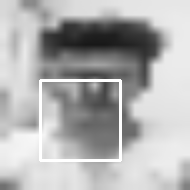

(1, 19, 19)
1/1 [==============================] - 0s 38ms/step
(1, 19, 19)
1/1 [==============================] - 0s 38ms/step
(1, 19, 19)
1/1 [==============================] - 0s 33ms/step
(1, 19, 19)
1/1 [==============================] - 0s 38ms/step
(1, 19, 19)
1/1 [==============================] - 0s 33ms/step
(1, 19, 19)
1/1 [==============================] - 0s 37ms/step
(1, 19, 19)
1/1 [==============================] - 0s 46ms/step
(1, 19, 19)
1/1 [==============================] - 0s 35ms/step
(1, 19, 19)
1/1 [==============================] - 0s 32ms/step


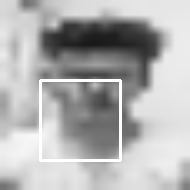

(1, 19, 19)
1/1 [==============================] - 0s 33ms/step
(1, 19, 19)
1/1 [==============================] - 0s 43ms/step
(1, 19, 19)
1/1 [==============================] - 0s 35ms/step
(1, 19, 19)
1/1 [==============================] - 0s 39ms/step
(1, 19, 19)
1/1 [==============================] - 0s 40ms/step
(1, 19, 19)
1/1 [==============================] - 0s 38ms/step
(1, 19, 19)
1/1 [==============================] - 0s 35ms/step
(1, 19, 19)
1/1 [==============================] - 0s 33ms/step
(1, 19, 19)
1/1 [==============================] - 0s 32ms/step
(1, 19, 19)
1/1 [==============================] - 0s 31ms/step
(1, 19, 19)
1/1 [==============================] - 0s 36ms/step
(1, 19, 19)
1/1 [==============================] - 0s 34ms/step
(1, 19, 19)
1/1 [==============================] - 0s 33ms/step
(1, 19, 19)
1/1 [==============================] - 0s 37ms/step
(1, 19, 19)
1/1 [==============================] - 0s 35ms/step
(1, 19, 19)
1/1 [=======================

error: ignored

In [37]:
# define a video capture object
vid = cv2.VideoCapture('gdrive/MyDrive/dataset/vid1.mp4')
while(vid.isOpened()):
    # Capture the video frame
    # by frame
    ret, frame = vid.read()
    img = cv2.resize(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY), (19,19))
    cimg = img.copy()
    k_size = 8
    for i in range(0,img.shape[0]-k_size+1, k_size//2):
        for j in range(0,img.shape[1]-k_size+1, k_size//2):
            newimg = cv2.resize(img[i:i+k_size, j:j+k_size], (19,19) )
            newimg = np.expand_dims(newimg, axis=0)
            print(newimg.shape)
            if(loaded_model.predict(newimg) > 0.5 ):
                newimg=cv2.resize(cimg,(190,190))
                cv2.rectangle(newimg, (j*10,i*10), ((j+k_size)*10, (i+k_size)*10), 255, 2)
                cv2_imshow(newimg)
                cv2.waitKey(1)
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()